# General Trend: Plot all data on the same graph 

1. Split DataFrame into adjacent columns for both channels, remove NaN values
   1. Find biggest deviation in Relative Time column, this is where the data for the channels splits 


In [79]:
import pandas as pd 
import matplotlib.pyplot as plt

def print_dataframe_pls(dataframe):
    with pd.option_context('display.max_rows', None,
                        'display.max_columns', None,
                        'display.precision', 3,
                        ):
        print(dataframe)




first_test = pd.read_csv(filepath_or_buffer = r"C:\Users\asenn\OneDrive\School\Research\MSIPP (Georgia 2023)\Temperature Data\t1e1.csv", skiprows=18)
split_df_index_location = first_test.diff().multiply(-1).idxmax()[0]

load_channel_raw = first_test.iloc[:split_df_index_location,:].dropna(axis=1)
# Drop last row in load_channel so that load_channel and pvc_channel have the same length 
load_channel_raw.drop([len(load_channel_raw)-1], inplace=True)
# Multiply to make sure that Load is in grams 10 mV = 250g 
load_channel = load_channel_raw.multiply(other= [1, -1000 * 25])

# Sort pvc data into separate DataFrame to combine later 
pvc_channel = first_test.iloc[split_df_index_location:,:].dropna(axis=1).drop(columns=['Relative Time']).reset_index(drop = True)  * -1000 # Convert V to mV 

# Combine DataFrames into n x 3 DataFrame() with Time, Load and PVC Response 
main_df_untrimmed = pd.concat((load_channel, pvc_channel), axis=1)

stopping_point = main_df_untrimmed.diff().multiply(-1).idxmax()[1]

#! Uncomment this line of code if you need to view the full DataFrame() 
# print_dataframe_pls(main_df_untrimmed)

main_df = main_df_untrimmed[stopping_point - 900:stopping_point]

#! Uncomment this line of code if you need to view the full DataFrame() 
# print_dataframe_pls(main_df)

C:\Users\asenn\AppData\Local\Temp\ipykernel_776\3457444894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df.rename({'CH110':'Load (g)', 'CH108':'Response (mV)'}, inplace=True, axis = 1)


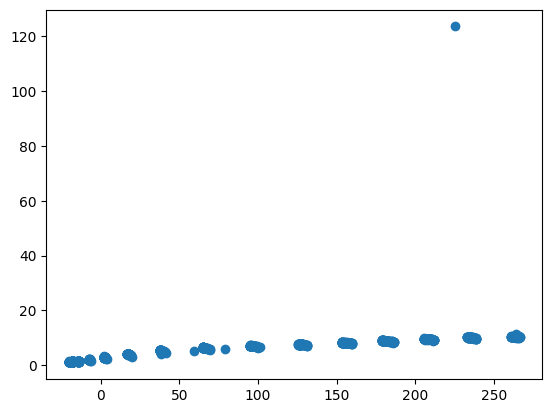

In [80]:


# Rename columns from CH1XX to Load and Response
main_df.rename({'CH110':'Load (g)', 'CH108':'Response (mV)'}, inplace=True, axis = 1)


fig, ax = plt.subplots()
ax.scatter(main_df['Load (g)'], main_df['Response (mV)'] )





